# Лабораторная работа №3

> Разработка и исследование редактора правил для продукционной системы

* Научиться представлять атрибуты знаний;
* Разработать алгоритмы создания и редактирования компонентов баз знаний;
* Разрабатывать интерфейсы пользователей для редактора правил;
* Разработать форматы представления атрибутов и правил в информационных системах.

## Входные данные

In [29]:
users = [
    {'age': 25, "income": 50000, "credit_history": "good"},
    {'age': 22, "income": 30000, "credit_history": "bad"},
    {'age': 30, "income": 60000, "credit_history": "good"},
    {'age': 22, "income": 30000},
]

## Прочитать базу знаний

In [30]:
import yaml

# Загрузка данных из файла YAML
with open('knowledge_base.yml', 'r') as file:
    knowledge_base = yaml.load(file, Loader=yaml.FullLoader)

## Опишем функции для проверки правил

In [31]:
# Функция для применения правил
def apply_rules(attributes, rules):
    for rule in rules:
        antecedent = rule["antecedent"]
        consequent = rule["consequent"]
        if all(eval_condition(attributes, antecedent) for antecedent in [antecedent]):
            return consequent
    return None

In [32]:
# Функция для проверки условия в антецеденте
def eval_condition(attributes, condition):
    for sub_condition in condition:
        attr_name = sub_condition["attribute"]
        if attr_name in attributes:
            attr_value = attributes[attr_name]
            operator = sub_condition["operator"]
            value = sub_condition["value"]

            if operator == "eq":  # equal
                if attr_value != value:
                    return False
            elif operator == "gt":  # greater than
                if attr_value <= value:
                    return False
            elif operator == "lt":  # less than
                if attr_value >= value:
                    return False
            elif operator == "ge":  # greater than or equal to
                if attr_value < value:
                    return False
            elif operator == "le":  # less than or equal to
                if attr_value > value:
                    return False
        else:
            return False  # если атрибут отсутствует во входных данных, считаем условие не выполненным

    return True

In [33]:
# Применить правила к нескольким пользователям
def apply_rules_to_users(users, rules):
    for user in users:
        result = apply_rules(user, rules)
        if result:
            print(f"Решение для пользователя {user}: {result['value']}")
        else:
            print(f"Решение для пользователя {user}: Нет подходящего решения")

## Непосредственный запуск приложения

In [34]:
# Дальше запуск скрипта
apply_rules_to_users(users, knowledge_base['rules'])

Решение для пользователя {'age': 25, 'income': 50000, 'credit_history': 'good'}: approved
Решение для пользователя {'age': 22, 'income': 30000, 'credit_history': 'bad'}: rejected
Решение для пользователя {'age': 30, 'income': 60000, 'credit_history': 'good'}: approved
Решение для пользователя {'age': 22, 'income': 30000}: rejected


## Визуализируем результат на графике

Решение для пользователя {'age': 25, 'income': 50000, 'credit_history': 'good'}: approved


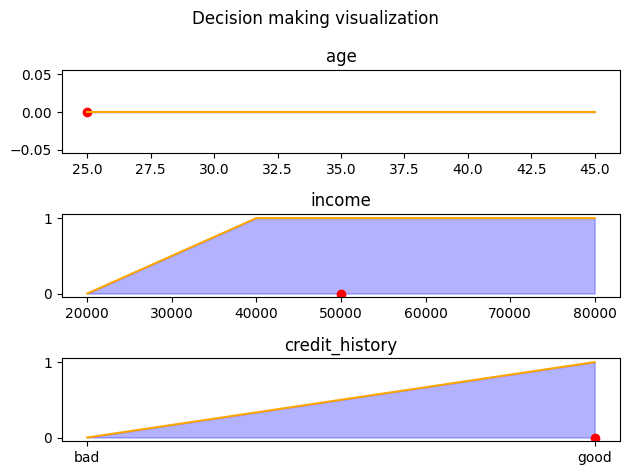

Решение для пользователя {'age': 22, 'income': 30000, 'credit_history': 'bad'}: rejected


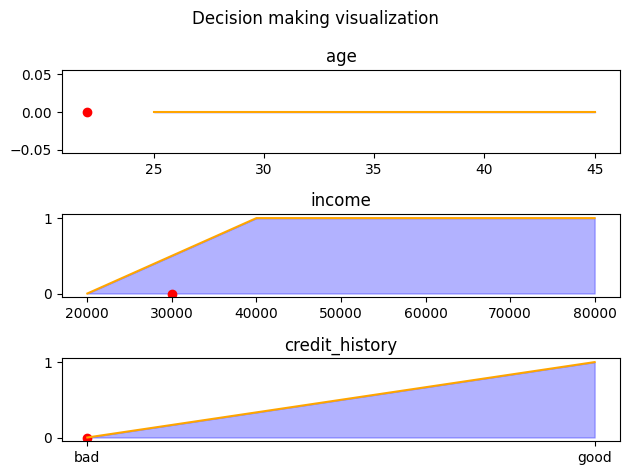

Решение для пользователя {'age': 30, 'income': 60000, 'credit_history': 'good'}: approved


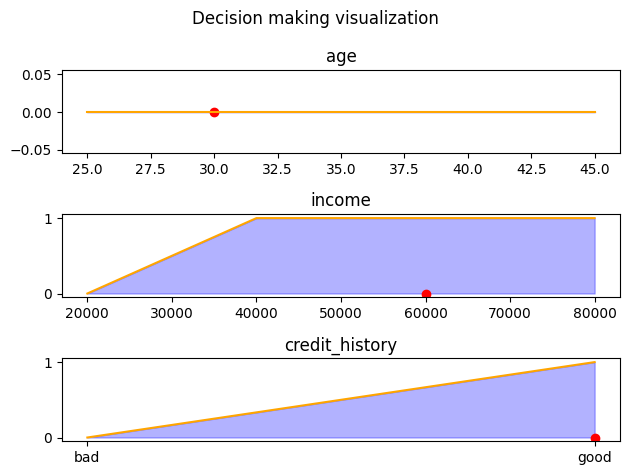

Решение для пользователя {'age': 22, 'income': 30000}: rejected


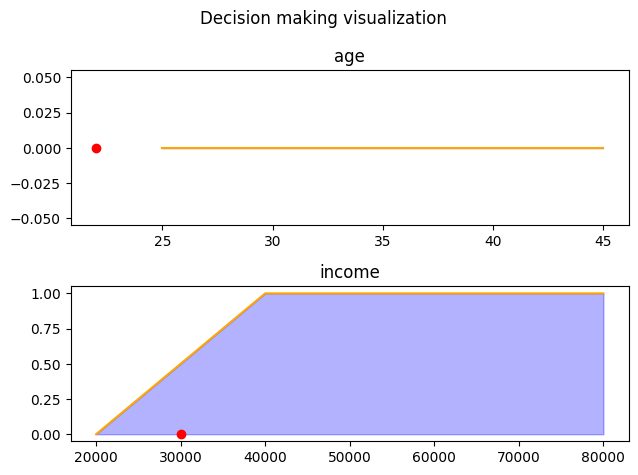

In [35]:
import matplotlib.pyplot as plt


# Функция для визуализации принятия решения
def draw_decision(user, rules, attributes):
    fig, axs = plt.subplots(len(user))
    fig.suptitle('Decision making visualization')

    # Сначала определим диапазоны из базы знаний
    attr_ranges = {attr: detail['values'] for attr, detail in attributes.items()}

    for i, (attr, attr_value) in enumerate(user.items()):
        axs[i].set_title(attr)

        # Если у нас есть диапазон для этого атрибута в базе знаний, используем его
        if attr in attr_ranges:
            x = attr_ranges[attr]
        else:
            x = ['bad', 'good']  # Для атрибута 'credit_history'

        # Определяем, где находится значение атрибута на графике
        if attr_value in x:
            x_value = x.index(attr_value)
        else:
            x_value = attr_value

        # Создаем базовую трапецию
        y = [0]*len(x)
        if 0 < x_value < len(x)-1:
            y[x_value-1:x_value+2] = [1, 1, 1]

        # Показываем пороговые значения из правил
        for rule in rules:
            for condition in rule['antecedent']:
                if condition['attribute'] == attr:
                    if condition['operator'] == 'eq':
                        y = [1 if xi!=condition['value'] else 0 for xi in x]
                    if condition['operator'] == 'le':
                        y = [1 if xi<=condition['value'] else 0 for xi in x][::-1]
                    if condition['operator'] == 'lt':
                        y = [1 if xi<condition['value'] else 0 for xi in x][::-1]
                    if condition['operator'] == 'ge':
                        y = [1 if xi>=condition['value'] else 0 for xi in x]
                    if condition['operator'] == 'gt':
                        y = [1 if xi>condition['value'] else 0 for xi in x]


        axs[i].fill_between(x, y, color='blue', alpha=0.3)
        axs[i].plot(x, y, color='orange')
        axs[i].scatter(attr_value, 0, color='red')  # Местоположение значения атрибута

    plt.tight_layout()
    plt.show()


# Для каждого пользователя рисуем график
for user in users:
    result = apply_rules(user, knowledge_base['rules'])
    if result:
        print(f"Решение для пользователя {user}: {result['value']}")
    else:
        print(f"Решение для пользователя {user}: Нет подходящего решения")
    draw_decision(user, knowledge_base['rules'], knowledge_base['attributes'])